#Técnicas de agrupamiento
Diego Rosas A01634154

In [14]:
#------------------------------------------------------------------------------------------------------------------
#   Evaluation of clustering methods
#------------------------------------------------------------------------------------------------------------------

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances

####### Helper funtion for plotting #######
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()


In [15]:
data = pd.read_csv('country_data.csv')

In [16]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
# Obtiene la lista de columnas
columnas = data.columns.tolist()

# Imprime la lista de columnas
print(columnas)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


<ipython-input-14-60972c4a53bd>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')


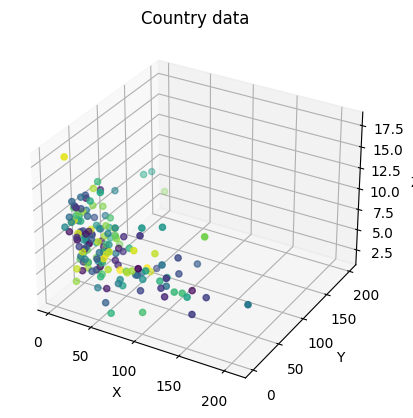

In [18]:
cmap = plt.get_cmap('viridis')
points = data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']].values
labels = data['country']
colors = cmap(np.linspace(0, 1, len(labels)))
plot_data(points, colors, 'Country data')

#1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

----- K-means -----


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels:  [2 8 8 2 0 0 8 1 1 8 7 9 2 0 0 1 8 2 2 2 8 8 0 4 8 2 2 2 2 1 2 2 2 0 8 8 2
 2 2 8 2 0 7 7 1 8 8 8 8 7 2 0 8 1 1 0 2 8 1 2 7 8 8 2 2 2 2 0 1 2 8 0 8 1
 7 1 8 1 8 0 2 2 4 2 2 0 0 2 2 0 0 6 8 2 2 0 8 2 7 2 0 2 2 8 8 2 2 2 8 2 1
 7 2 2 5 9 2 0 8 8 2 0 7 3 0 0 2 2 9 2 8 0 2 4 0 7 2 8 7 7 8 8 2 8 1 5 2 2
 8 2 2 2 8 0 8 2 8 4 1 1 0 2 2 0 2 2 2]
Centers:  [[1.38000000e+01 4.81555556e+01 6.39333333e+00 4.72222222e+01
  1.92148148e+04 7.87048148e+00 7.45037037e+01 1.94444444e+00
  1.10600000e+04]
 [4.29375000e+00 4.31437500e+01 1.07662500e+01 4.01312500e+01
  4.11250000e+04 1.09125000e+00 8.08062500e+01 1.79625000e+00
  4.61125000e+04]
 [7.69451613e+01 2.86257903e+01 6.20467742e+00 4.61946113e+01
  2.84424194e+03 1.02646129e+01 6.23225806e+01 4.41209677e+00
  1.30941935e+03]
 [9.00000000e+00 6.23000000e+01 1.81000000e+00 2.38000000e+01
  1.25000000e+05 6.98000000e+00 7.95000000e+01 2.07000000e+00
  7.03000000e+04]
 [8.17500000e+00 1.02950000e+02 3.27250000e+00 7.40000000e+01
  7.1375000

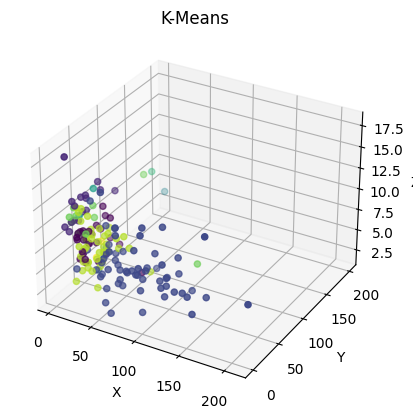

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

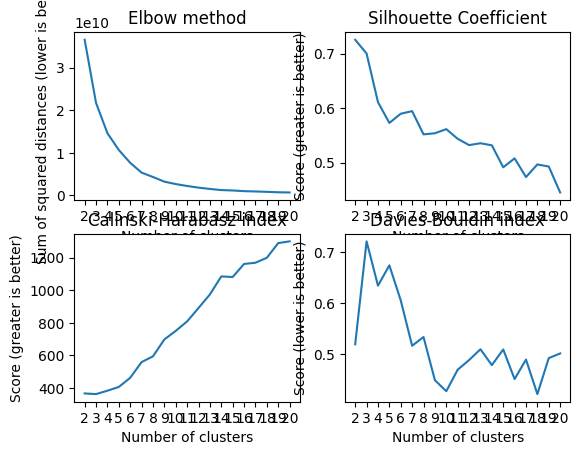

In [19]:
####### K-means #######
print('----- K-means -----')

kmeans = KMeans(n_clusters=10).fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(points, clustering_labels, 'K-Means')

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2)

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()



----- Dendrogram plot -----


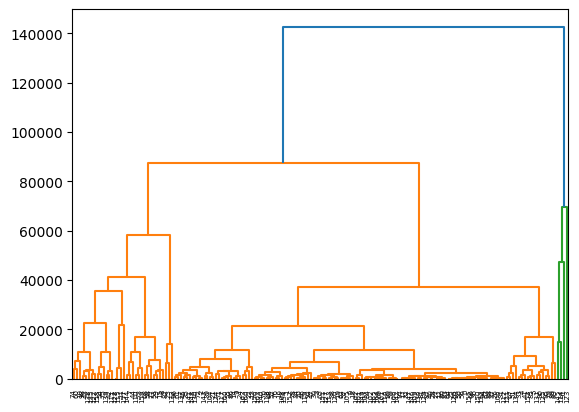

In [20]:
####### Dendrogram plot #######
print('----- Dendrogram plot -----')

linked = linkage(points, 'complete')
labelList = range(1, 11)

plt.figure()
dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.show()


#2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Labels:  [3 3 3 3 3 3 3 6 6 3 0 0 3 3 3 6 3 3 3 3 3 3 3 2 3 3 3 3 3 6 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 6 3 3 3 3 0 3 3 3 6 6 3 3 3 6 3 0 3 3 3 3 3 3 3 6 3 3 3 3 6
 0 6 3 6 3 3 3 3 2 3 3 3 3 3 3 0 3 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 6
 0 3 3 1 0 3 3 3 3 3 3 0 5 3 3 3 3 0 3 3 3 3 2 0 0 3 3 0 0 3 3 3 3 6 1 3 3
 3 3 3 3 3 3 3 3 3 7 6 6 3 3 3 3 3 3 3]


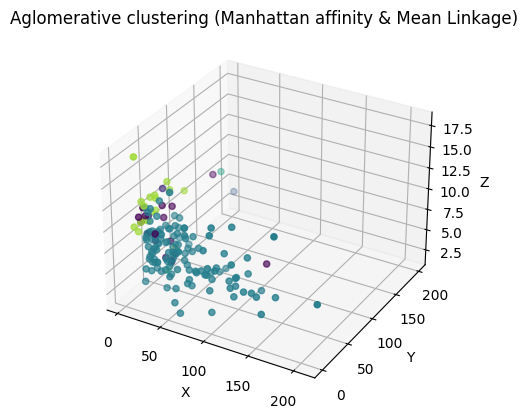

In [21]:
# Using custom distance matrix
dist = pairwise_distances(points, metric = 'l1')
agl = AgglomerativeClustering(n_clusters=8, linkage = 'average', affinity = 'precomputed').fit(dist)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Aglomerative clustering (Manhattan affinity & Mean Linkage)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

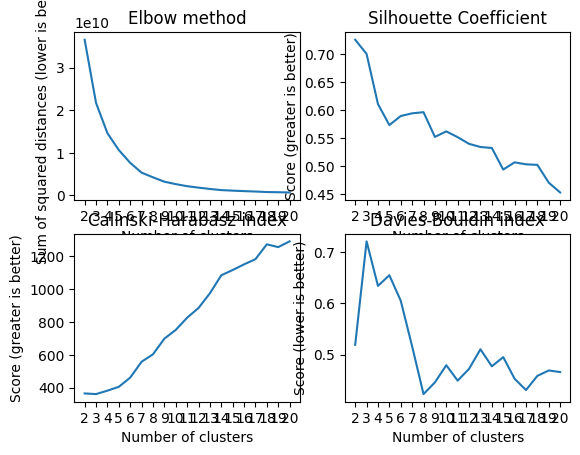

In [22]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2)

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

#3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

In [23]:
!pip install sklearn-som
from sklearn_som.som import SOM

iris_som = SOM(m=10, n=10, dim=9)
iris_som.fit(points)
predictions = iris_som.predict(points)

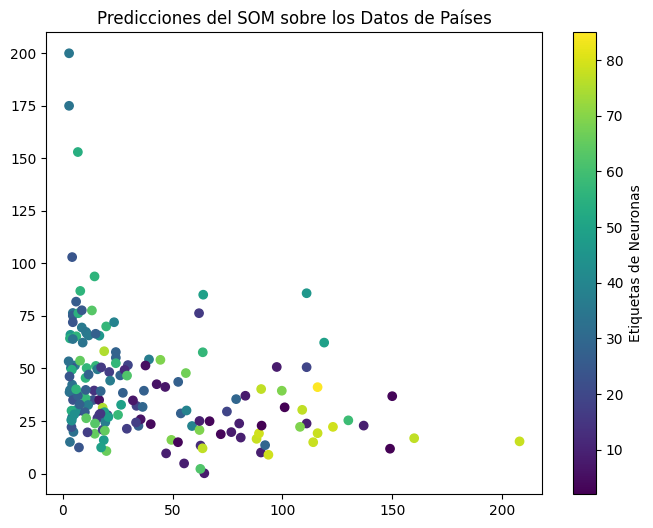

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=predictions, cmap='viridis')
plt.title('Predicciones del SOM sobre los Datos de Países')
plt.colorbar(label='Etiquetas de Neuronas')
plt.show()

#4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Realmente antes de realizar este ejercicio no tenía algún patrón en mente que podría esperar, simplemente consideraba que los países se podrían agrupar según sus características mas parecidas, por ejemplo, por inflación o gdps similares. Sin embargo, podemos observar que un patrón existe, y es que en todos los gráficos una gran cantidad se países se encuentra agrupada hacia el lado izquierdo, sin embargo, no se aprecia un patrón definido como tal ya que los países están dispersos.